In [2]:
import pandas as pd

In [3]:
#import the libraries

import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import matplotlib
matplotlib.rcParams.update({'font.size': 12})

In [4]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

In [5]:
import seaborn as sns

# ●	Load the data using Python Pandas library.

In [7]:
df=pd.read_csv('Automobile.csv')

In [8]:
df.head()

,symboling,normalized_losses,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,168,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,168,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,168,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


# ●	Do Exploratory Data Analysis of the data and state your insights.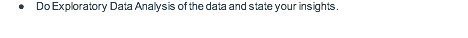

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 26 columns):
symboling              201 non-null int64
normalized_losses      201 non-null int64
make                   201 non-null object
fuel_type              201 non-null object
aspiration             201 non-null object
number_of_doors        201 non-null object
body_style             201 non-null object
drive_wheels           201 non-null object
engine_location        201 non-null object
wheel_base             201 non-null float64
length                 201 non-null float64
width                  201 non-null float64
height                 201 non-null float64
curb_weight            201 non-null int64
engine_type            201 non-null object
number_of_cylinders    201 non-null object
engine_size            201 non-null int64
fuel_system            201 non-null object
bore                   201 non-null float64
stroke                 201 non-null float64
compression_ratio      201 non-nu

In [8]:
#check for outliers in target variable-price

In [9]:
df1=df.copy()

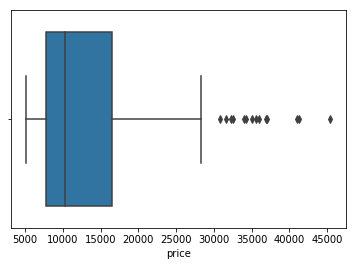

In [10]:
sns.boxplot(df1['price'])

In [11]:
df1['price'].describe()

count      201.000000
mean     13207.129353
std       7947.066342
min       5118.000000
25%       7775.000000
50%      10295.000000
75%      16500.000000
max      45400.000000
Name: price, dtype: float64

In [12]:
Q1=7775.000000
Q3=16500.000000
IQR=Q3-Q1
u_limit=Q3+1.5*IQR
l_limit=Q1-1.5*IQR

In [13]:
df2=df1[(df1['price']>=l_limit)&
       (df1['price']<=u_limit)]

In [14]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 187 entries, 0 to 200
Data columns (total 26 columns):
symboling              187 non-null int64
normalized_losses      187 non-null int64
make                   187 non-null object
fuel_type              187 non-null object
aspiration             187 non-null object
number_of_doors        187 non-null object
body_style             187 non-null object
drive_wheels           187 non-null object
engine_location        187 non-null object
wheel_base             187 non-null float64
length                 187 non-null float64
width                  187 non-null float64
height                 187 non-null float64
curb_weight            187 non-null int64
engine_type            187 non-null object
number_of_cylinders    187 non-null object
engine_size            187 non-null int64
fuel_system            187 non-null object
bore                   187 non-null float64
stroke                 187 non-null float64
compression_ratio      187 non-nu

In [15]:
#remove categorical column which is not significant

In [16]:
df2.head()

,symboling,normalized_losses,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,168,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,168,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,168,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [17]:
df2.drop(columns={'symboling','make'},inplace=True)

/opt/anaconda2/lib/python2.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [18]:
df2.head()

,normalized_losses,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,168,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,168,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,168,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,164,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,164,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [19]:
df2=pd.get_dummies(df2,drop_first=True)

In [20]:
df2.head()

,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,...,number_of_cylinders_six,number_of_cylinders_three,number_of_cylinders_two,fuel_system_2bbl,fuel_system_4bbl,fuel_system_idi,fuel_system_mfi,fuel_system_mpfi,fuel_system_spdi,fuel_system_spfi
0,168,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,1,0,0
1,168,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,1,0,0
2,168,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,...,1,0,0,0,0,0,0,1,0,0
3,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,...,0,0,0,0,0,0,0,1,0,0
4,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,...,0,0,0,0,0,0,0,1,0,0


In [21]:
pd.options.display.max_columns=None
pd.options.display.max_rows=None

In [22]:
df2.head()

,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price,fuel_type_gas,aspiration_turbo,number_of_doors_two,body_style_hardtop,body_style_hatchback,body_style_sedan,body_style_wagon,drive_wheels_fwd,drive_wheels_rwd,engine_type_l,engine_type_ohc,engine_type_ohcf,engine_type_ohcv,engine_type_rotor,number_of_cylinders_four,number_of_cylinders_six,number_of_cylinders_three,number_of_cylinders_two,fuel_system_2bbl,fuel_system_4bbl,fuel_system_idi,fuel_system_mfi,fuel_system_mpfi,fuel_system_spdi,fuel_system_spfi
0,168,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
1,168,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
2,168,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500,1,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0
3,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
4,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [23]:
df2.shape

(187, 40)

# ●	Perform Multiple Regression Model.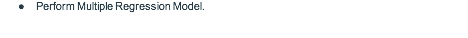

In [24]:
#Model 1 Linear regression

In [25]:
df1=df2.copy()

In [26]:
X=df1.drop(columns={'price'})

In [27]:
y=df1['price']

In [28]:
from sklearn.model_selection import train_test_split


In [29]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [30]:
lin_reg=LinearRegression()
model=lin_reg.fit(X_train,y_train)
print('train data input size: ',X_train.shape)
print('train data target size: ',X_test.shape)
print('test data input size: ',y_train.shape)
print('test data target size: ',y_test.shape)

('train data input size: ', (130, 39))
('train data target size: ', (57, 39))
('test data input size: ', (130,))
('test data target size: ', (57,))


In [31]:
y_pred=model.predict(X_test)

In [32]:
from sklearn import metrics

In [33]:
RMSE=np.sqrt(metrics.mean_squared_error(y_pred,y_test))
print("RMSE :",RMSE)

('RMSE :', 2344.5730148256143)


In [34]:
print('R^2 for test',model.score(X_train,y_train))

('R^2 for test', 0.9083611816564179)


In [35]:
print('R^2 for test',model.score(X_test,y_test))

('R^2 for test', 0.7774924913029656)


In [36]:
#Model 2 OLS

In [37]:
import statsmodels.api as sm


In [38]:
X_constant=sm.add_constant(X)
model2=sm.OLS(y,X_constant).fit()
model2.summary()

/opt/anaconda2/lib/python2.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     38.79
Date:                Thu, 05 Dec 2019   Prob (F-statistic):           1.73e-59
Time:                        19:16:27   Log-Likelihood:                -1635.8
No. Observations:                 187   AIC:                             3348.
Df Residuals:                     149   BIC:                             3470.
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                     -2.268e+04   8211.516     -2.762      0.006   -3.89e+04   -6455.996
normalized_losses            17.4109      6.245      2.788      0.006       5.071      29.750
wheel_base                   97.5433     78.888      1.236      0.218     -58.341     253.427
length                      -72.5158     40.681     -1.783      0.077    -152.903       7.871
width                       534.0749    197.350      2.706      0.008     144.109     924.041
height                       95.6782    109.210      0.876      0.382    -120.122     311.478
curb_weight                   4.6957      1.539      3.052      0.003       1.655       7.736
engine_size                  -2.1925     27.251     -0.080      0.936     -56.042      51.657
bore                       1708.6263   1396.039      1.224      0.223   -1049.966    4467.218
stroke                    -2760.1976    743.274     -3.714      0.000   -4228.918   -1291.477
compression_ratio           224.9349    416.106      0.541      0.590    -597.296    1047.165
horsepower                   15.2396     19.087      0.798      0.426     -22.477      52.956
peak_rpm                     -0.1196      0.533     -0.225      0.823      -1.172       0.933
city_mpg                   -268.3818    115.876     -2.316      0.022    -497.354     -39.410
highway_mpg                 189.7823    105.367      1.801      0.074     -18.424     397.989
fuel_type_gas             -9793.8405   4409.442     -2.221      0.028   -1.85e+04   -1080.724
aspiration_turbo           2020.0535    710.080      2.845      0.005     616.926    3423.181
number_of_doors_two        -407.0779    458.809     -0.887      0.376   -1313.690     499.534
body_style_hardtop        -3936.3815   1326.022     -2.969      0.003   -6556.619   -1316.144
body_style_hatchback      -3241.2121   1083.338     -2.992      0.003   -5381.902   -1100.523
body_style_sedan          -2810.6564   1176.132     -2.390      0.018   -5134.709    -486.603
body_style_wagon          -3645.0539   1255.948     -2.902      0.004   -6126.824   -1163.284
drive_wheels_fwd            424.6603    882.338      0.481      0.631   -1318.852    2168.172
drive_wheels_rwd           1712.2357   1010.898      1.694      0.092    -285.312    3709.783
engine_type_l             -2867.1492   1567.227     -1.829      0.069   -5964.011     229.712
engine_type_ohc            1921.4700    874.622      2.197      0.030     193.205    3649.735
engine_type_ohcf           -567.8544   1274.101     -0.446      0.656   -3085.494    1949.786
engine_type_ohcv          -1756.9243   1078.933     -1.628      0.106   -3888.910     375.061
engine_type_rotor           420.4930   1342.188      0.313      0.754   -2231.689    3072.675
number_of_cylinders_four  -3806.3865   1074.631     -3.542      0.001   -59

# ●	Perform the regularization techniques – Lasso, Ridge, Elastic-Net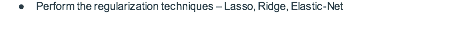

## Lasso

In [39]:
import math 
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np

In [40]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [41]:
#split train and test
lasso=Lasso()
lasso.fit(X_train,y_train)
train_score=lasso.score(X_train,y_train)
test_score=lasso.score(X_test,y_test)
coef_used=np.sum(lasso.coef_!=0)


In [42]:
print('train score : '),train_score
print("test score:"),test_score
print("number of features used"),coef_used

train score :  0.9079406220096504
test score: 0.8039364530634906
number of features used 36


In [43]:
lasso=Lasso(alpha=0.01,max_iter=10e5)
lasso.fit(X_train,y_train)
train_score=lasso.score(X_train,y_train)
test_score=lasso.score(X_test,y_test)
coef_used=np.sum(lasso.coef_!=0)
print('train score: '),train_score
print("test score:"),test_score
print("number of features used"),coef_used

train score:  0.9083611350467901
test score: 0.7778310881878832
number of features used 35


In [44]:
lasso=Lasso(alpha=0.0001,max_iter=10e5)
lasso.fit(X_train,y_train)
train_score=lasso.score(X_train,y_train)
test_score=lasso.score(X_test,y_test)
coef_used=np.sum(lasso.coef_!=0)
print('train score for 0.01: '),train_score
print("test score:"),test_score
print("number of features used"),coef_used

train score for 0.01:  0.9083611816517572
test score: 0.7774958808585672
number of features used 35


In [45]:
lasso=Lasso(alpha=10,max_iter=10e5)
lasso.fit(X_train,y_train)
train_score=lasso.score(X_train,y_train)
test_score=lasso.score(X_test,y_test)
coef_used=np.sum(lasso.coef_!=0)
print('train score for 10: '),train_score
print("test score:"),test_score
print("number of features used"),coef_used

train score for 10:  0.8966111501089478
test score: 0.8422572190206294
number of features used 27


In [46]:
lasso=Lasso(alpha=100,max_iter=10e5)
lasso.fit(X_train,y_train)
train_score=lasso.score(X_train,y_train)
test_score=lasso.score(X_test,y_test)
coef_used=np.sum(lasso.coef_!=0)
print('train score for 100: '),train_score
print("test score:"),test_score
print("number of features used"),coef_used

train score for 100:  0.8458632445657421
test score: 0.7912197169918304
number of features used 16


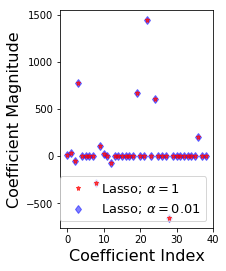

In [47]:
plt.subplot(1,2,1)
plt.plot(lasso.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 1$',zorder=7) # alpha here is for transparency
plt.plot(lasso.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 0.01$') # alpha here is for transparency
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)

### Ridge

In [48]:
lasso.coef_==0

array([False, False, False, False,  True, False, False,  True, False,
       False, False, False, False,  True,  True,  True,  True,  True,
        True, False,  True,  True, False,  True, False,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True])

In [49]:
lasso.coef_.shape

(39,)

In [50]:
X.shape[1]

39

In [51]:
#take out relevant features
good_fea=[]

In [52]:
for i in range(len(X.columns)):
    if lasso.coef_[i]!=0:
        good_fea.append(X.columns[i])


In [53]:
good_fea

['normalized_losses',
 'wheel_base',
 'length',
 'width',
 'curb_weight',
 'engine_size',
 'stroke',
 'compression_ratio',
 'horsepower',
 'peak_rpm',
 'city_mpg',
 'body_style_sedan',
 'drive_wheels_rwd',
 'engine_type_ohc',
 'number_of_cylinders_four',
 'fuel_system_mpfi']

In [54]:
X1=X[good_fea]


In [55]:
X_train,X_test,y_train,y_test=train_test_split(X1,y,random_state=1)

In [56]:
lr=LinearRegression()

In [57]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [58]:
# higher the alpha value, more restriction on the coefficients; 
# low alpha > more generalization, coefficients are barely
rr=Ridge(alpha=0.01)
# restricted and in this case linear and ridge regression resembles
rr.fit(X_train,y_train)

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [59]:
train_score=lr.score(X_train,y_train)
test_score=lr.score(X_test,y_test)


In [60]:
ridge_train_score=rr.score(X_train,y_train)
ridge_test_score=rr.score(X_test,y_test)

In [61]:
rr100 = Ridge(alpha=100) #  comparison with alpha value
rr100.fit(X_train, y_train)

Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [62]:
ridge_train_score_100=rr100.score(X_train,y_train)
ridge_test_score_100=rr100.score(X_test,y_test)

In [63]:
print("linear regression train score:", train_score)
print("linear regression test score:", test_score)
print("ridge regression train score low alpha:", ridge_train_score)
print("ridge regression test score low alpha:", ridge_test_score)
print("ridge regression train score high alpha:", ridge_train_score_100)
print("ridge regression test score high alpha:", ridge_test_score_100)

('linear regression train score:', 0.878760330354116)
('linear regression test score:', 0.823044975914536)
('ridge regression train score low alpha:', 0.8787602211189076)
('ridge regression test score low alpha:', 0.8230630747969987)
('ridge regression train score high alpha:', 0.8077770927039243)
('ridge regression test score high alpha:', 0.8039991353350424)


In [64]:
y_pred=rr.predict(X_test)
print('RMSE for 0.01:',np.sqrt(metrics.mean_squared_error(y_pred,y_test)))

('RMSE for 0.01:', 2179.006212307069)


In [65]:
y_pred=rr100.predict(X_test)
print('RMSE for 100:',np.sqrt(metrics.mean_squared_error(y_pred,y_test)))

('RMSE for 100:', 2293.3916350109844)


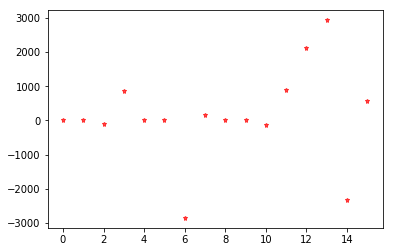

In [66]:
plt.plot(rr.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 0.01$',zorder=7) # zorder for ordering the markers

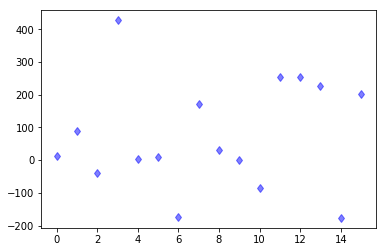

In [67]:
plt.plot(rr100.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Ridge; $\alpha = 100$') # alpha here is for transparency

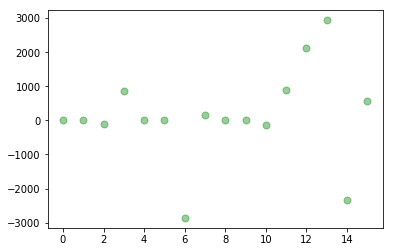

In [68]:
plt.plot(lr.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')

## Elastic Net

In [69]:
# Let's perform a cross-validation to find the best combination of alpha and l1_ratio
from sklearn.linear_model import ElasticNetCV, ElasticNet
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

cv_model = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, .995, 1], eps=0.001, n_alphas=100, fit_intercept=True, 
                        normalize=True, precompute='auto', max_iter=2000, tol=0.0001, cv=5, 
                        copy_X=True, verbose=0, n_jobs=-1, positive=False, random_state=None, selection='cyclic')
#ll_ration to check random value if lambda and lambda1
#n_jobs=-1, it allows you to use all resources of laptop

In [70]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1)

In [71]:
cv_model.fit(X_train,y_train)

ElasticNetCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
       l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 0.995, 1], max_iter=2000,
       n_alphas=100, n_jobs=-1, normalize=True, positive=False,
       precompute='auto', random_state=None, selection='cyclic',
       tol=0.0001, verbose=0)

In [72]:
print('Optimal alpha: %.8f'%cv_model.alpha_)
print('Optimal l1_ratio: %.3f'%cv_model.l1_ratio_)
print('Number of iterations %d'%cv_model.n_iter_)

Optimal alpha: 8.64962994
Optimal l1_ratio: 1.000
Number of iterations 53


In [73]:
# train model with best parameters from CV

model = ElasticNet(l1_ratio=cv_model.l1_ratio_, alpha = cv_model.alpha_, max_iter=cv_model.n_iter_, fit_intercept=True, normalize = True)
model.fit(X_train,y_train)

ElasticNet(alpha=8.649629943567282, copy_X=True, fit_intercept=True,
      l1_ratio=1.0, max_iter=53, normalize=True, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

In [74]:
print(r2_score(y_train, model.predict(X_train))) # training data performance

0.8794230342930688


In [75]:
print(r2_score(y_train, model.predict(X_train))) # training data performance

0.8794230342930688


In [76]:
print(np.sqrt(mean_squared_error( model.predict(X_test),y_test))) # RMSE

2115.29920686834
